## Autoencoders

Outline of the project:

* [Introduction](#1)
* [Packages & Libraries](#2)
* [Data Import](#3)
* [Build Autoencoder](#4)
* [Evaluation](#5)
* [Prediction with Autoencoder](#6)

<a id = "1"></a>
### Introduction

<img src = "https://lilianweng.github.io/posts/2018-08-12-vae/denoising-autoencoder-architecture.png" width = "800" height = "500">

Autoencoders are a specific type of feedforward neural networks where the input is the same as the output. They compress the input into a lower-dimensional code and then reconstruct the output from this representation. The code is a compact “summary” or “compression” of the input, also called the latent-space representation. Autoencoders are a type of unsupervised learning.

An autoencoder consists of 3 components: encoder, code and decoder. The encoder compresses the input and produces the code, the decoder then reconstructs the input only using this code.

Source: [https://lilianweng.github.io/posts/2018-08-12-vae/]

<a id = "2"></a>
### Packages & Libraries

In [180]:
from keras.models import Model
from keras.layers import Input, Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json, codecs
import warnings
warnings.filterwarnings("ignore")

<a id = "3"></a>
### Data Import

In [181]:
train_df = pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv")
train_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
test_df = pd.read_csv("../input/fashionmnist/fashion-mnist_test.csv")
test_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We will only use input data because autoencoders are an unsupervised learning algorithm

In [183]:
x_train = train_df.iloc[:,1:]
x_train.shape

(60000, 784)

In [184]:
x_test = test_df.iloc[:,1:]
x_test.shape

(10000, 784)

In [185]:
# convert df to np array and normalize data
x_train = x_train.astype("float32").to_numpy() / 255.0
x_test = x_test.astype("float32").to_numpy() / 255.0

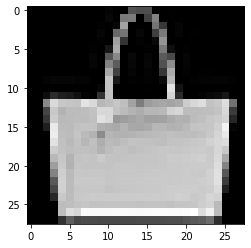

In [186]:
# visualize a random image
plt.imshow(x_train[2000].reshape(28, 28))

<a id = "4"></a>
### Build Autoencoder

In [215]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

encoder_model = Model(input_img, encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)


In [196]:
# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer = "rmsprop", loss = "binary_crossentropy")

hist = autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 128, shuffle = True, validation_data = (x_test, x_test))

Epoch 1/50
469/469 [==============================] - 7s 12ms/step - loss: 0.3589 - val_loss: 0.3233
Epoch 2/50
469/469 [==============================] - 6s 13ms/step - loss: 0.3164 - val_loss: 0.3098
Epoch 3/50
469/469 [==============================] - 6s 12ms/step - loss: 0.3066 - val_loss: 0.3004
Epoch 4/50
469/469 [==============================] - 6s 12ms/step - loss: 0.3011 - val_loss: 0.2993
Epoch 5/50
469/469 [==============================] - 5s 12ms/step - loss: 0.2975 - val_loss: 0.2954
Epoch 6/50
469/469 [==============================] - 5s 11ms/step - loss: 0.2948 - val_loss: 0.2944
Epoch 7/50
469/469 [==============================] - 6s 12ms/step - loss: 0.2927 - val_loss: 0.2912
Epoch 8/50
469/469 [==============================] - 5s 11ms/step - loss: 0.2910 - val_loss: 0.2905
Epoch 9/50
469/469 [==============================] - 6s 13ms/step - loss: 0.2896 - val_loss: 0.2875
Epoch 10/50
469/469 [==============================] - 6s 14ms/step - loss: 0.2884 - val_lo

In [197]:
autoencoder.save_weights("ae_weights.h5")

<a id = "5"></a>
### Evaluation

In [198]:
print(hist.history.keys())

dict_keys(['loss', 'val_loss'])


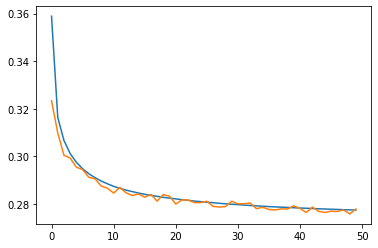

In [199]:
plt.plot(hist.history["loss"], label ="Train loss")
plt.plot(hist.history["val_loss"], label ="Val loss")

In [200]:
# save json file
with open("autoencoder_hist.json","w") as f:
    json.dump(hist.history, f)

In [201]:
# load json file
with codecs.open("./autoencoder_hist.json","r", encoding = "utf-8") as f:
    n = json.loads(f.read())

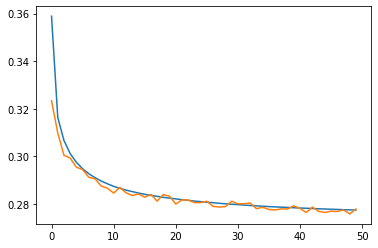

In [202]:
# read history from json file
plt.plot(n["loss"], label ="Train loss")
plt.plot(n["val_loss"], label ="Val loss")

<a id = "6"></a>
### Prediction with Autoencoder

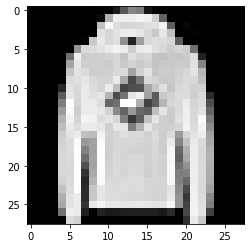

In [203]:
# original image
plt.imshow(x_test[1000].reshape(28, 28))

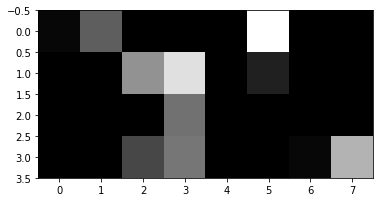

In [216]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder_model.predict(x_test)
# latent representation of an image
plt.imshow(encoded_imgs[1000].reshape(4, 8))

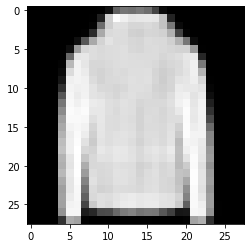

In [221]:
decoded_imgs = autoencoder.predict(x_test)
# predict an image
plt.imshow(decoded_imgs[1000].reshape(28, 28))

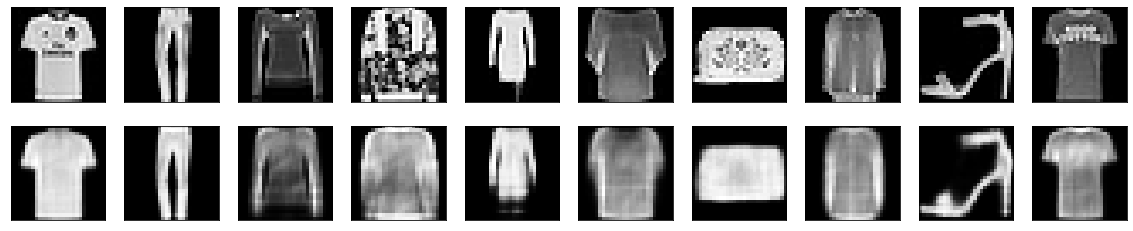

In [222]:
n = 10  # How many images we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Thanks...